## Import required libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read the input image

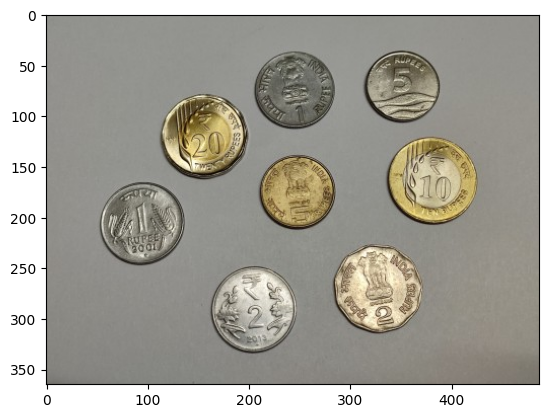

In [5]:
img = cv2.imread('/content/drive/MyDrive/CVIS_Thiran_2025/session_1/images/coins.jpg')
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

## Convert to gray scale image

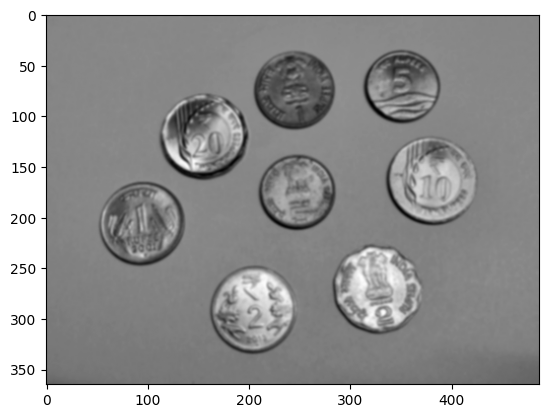

In [6]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
plt.imshow(blurred_img, cmap='gray')

## Plot the histogram of the blurred image

In [ ]:
plt.hist(blurred_img.ravel(), bins=256, range=[0, 256], color='black', alpha=0.7)

## Perform thresholding to segment the coins

In [ ]:
threshold_value = 120
_, thresholded_image = cv2.threshold(blurred_img, threshold_value, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresholded_image, cmap='gray')

## Perform thresholding with OTSU's method

In [ ]:
(thresh, otsu_thresholded_image) = cv2.threshold(blurred_img, 0, 255,
                                                 cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print(thresh)
plt.imshow(otsu_thresholded_image, cmap='gray')

## Perform thresholding with adaptive thresholding method

In [ ]:
adaptive_thresholded_image = cv2.adaptiveThreshold(blurred_img, 255,
                                        cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY_INV,
                                        11, 2)
plt.imshow(adaptive_thresholded_image, cmap='gray')

## Apply Morphological Processing to remove noise

In [ ]:
kernel = np.ones((3, 3), np.uint8)
morph_open = cv2.morphologyEx(adaptive_thresholded_image, cv2.MORPH_OPEN, kernel)
plt.imshow(morph_open,cmap='gray')